In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [2]:
font_path = 'C:\\windows\\Fonts\\malgun.ttf'
font_prop = fm.FontProperties(fname=font_path).get_name()
print(font_prop)
matplotlib.rc('font', family=font_prop)

Malgun Gothic


In [4]:
# 인구현황.csv 로드하여 DataFrame 객체생성 , 변수명은 df_all 
df_all = pd.read_csv("data/인구현황.csv")


In [5]:
# 전국 데이터는 제거하고 새로운 DataFrame 생성, 변수명은 df
df = df_all.loc[df_all['행정기관'] != '전국'].copy()
df.head()

,행정기관코드,행정기관,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
1,1100000000,서울특별시,9331828,4482063,2.08,4505355,4826473,0.93
2,2600000000,부산광역시,3266598,1570403,2.08,1589912,1676686,0.95
3,2700000000,대구광역시,2363629,1104130,2.14,1159601,1204028,0.96
4,2800000000,인천광역시,3021010,1373827,2.20,1509243,1511767,1.00
5,2900000000,광주광역시,1408422,658075,2.14,695224,713198,0.97


In [6]:
print("\n결측치 확인:")
print(df.isnull().sum())


결측치 확인:
행정기관코드    0
행정기관      0
총인구수      0
세대수       0
세대당 인구    0
남자 인구수    0
여자 인구수    0
남여 비율     0
dtype: int64


##### 1. 지역별 총인구수 Top5


In [35]:
print("1. 지역별 총인구수 Top5")
df.nlargest(5, "총인구수")[["행정기관", "총인구수"]].reindex()


1. 지역별 총인구수 Top5


,행정기관,총인구수
9,경기도,13694685
1,서울특별시,9331828
2,부산광역시,3266598
16,경상남도,3228380
4,인천광역시,3021010


##### 1-1. 지역별 총인구수 Plot

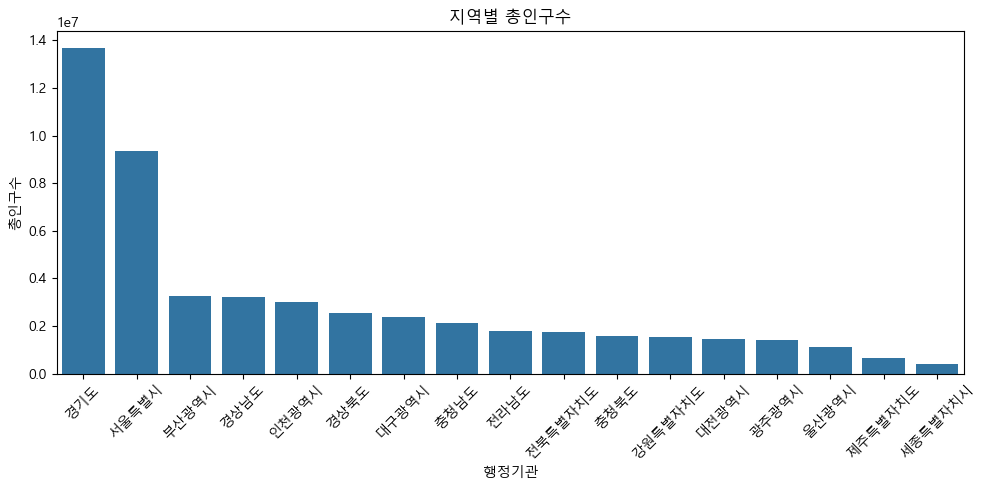

In [21]:
plt.figure(figsize=(10,5))
# seaborn의 barplot() 함수사용
sns.barplot(x="행정기관", y="총인구수",data=df_all.sort_values("총인구수",ascending=False).loc[df_all["행정기관"] != "전국"])
plt.xticks(rotation=45)
plt.title('지역별 총인구수')
plt.tight_layout()
plt.show()

##### 2. 세대당 인구수 높은 지역 Top5

In [ ]:
print("2. 세대당 인구수 높은 지역 Top5")
population = df_all.sort_values("세대당 인구", ascending=False).head(5)[["세대당 인구", "행정기관"]]
population.reset_index(drop=True)






2. 세대당 인구수 높은 지역 Top5


,세대당 인구,행정기관
0,2.39,세종특별자치시
1,2.26,경기도
2,2.22,울산광역시
3,2.20,인천광역시
4,2.14,대구광역시


##### 2-1. 지역별 세대당 인구 Plot

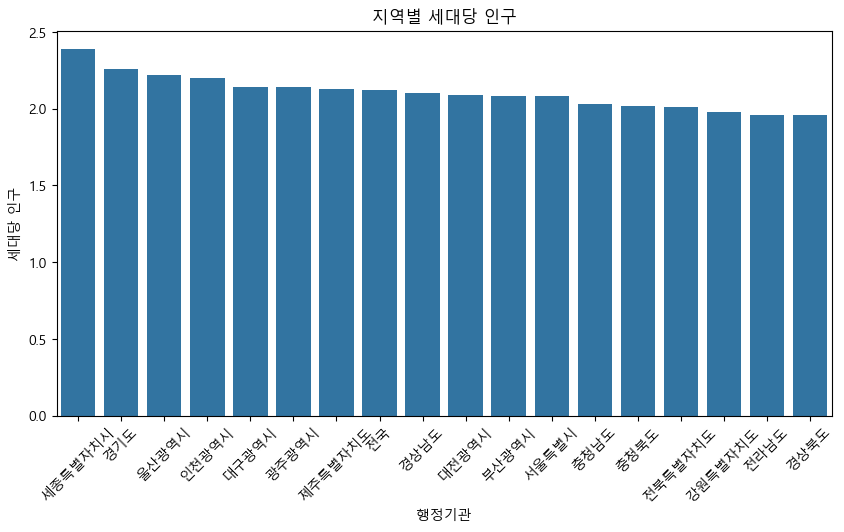

In [27]:
plt.figure(figsize=(10,5))
# seaborn의 barplot() 함수사용
sns.barplot(x="행정기관", y="세대당 인구", data=df_all.sort_values("세대당 인구", ascending=False))
# title
plt.title("지역별 세대당 인구")
# 글자 45 도 돌리기
plt.xticks(rotation=45)
plt.show()

##### 3. 남녀 비율 분석

In [41]:
print("3. 남녀 비율 분석")
df_all.sort_values("남여 비율", ascending=False)[["행정기관", "남여 비율"]].reset_index(drop=True)

3. 남녀 비율 분석


,행정기관,남여 비율
0,울산광역시,1.06
1,충청남도,1.05
2,충청북도,1.04
3,경상남도,1.02
4,경상북도,1.02
5,전라남도,1.02
6,경기도,1.01
7,강원특별자치도,1.01
8,제주특별자치도,1.00
9,인천광역시,1.00


##### 3-1. 지역별 남녀 비율 Plot
* 기준이 되는 빨간선은 pyplot의 axhline() 함수를 사용해 보세요.

<function matplotlib.pyplot.show(close=None, block=None)>

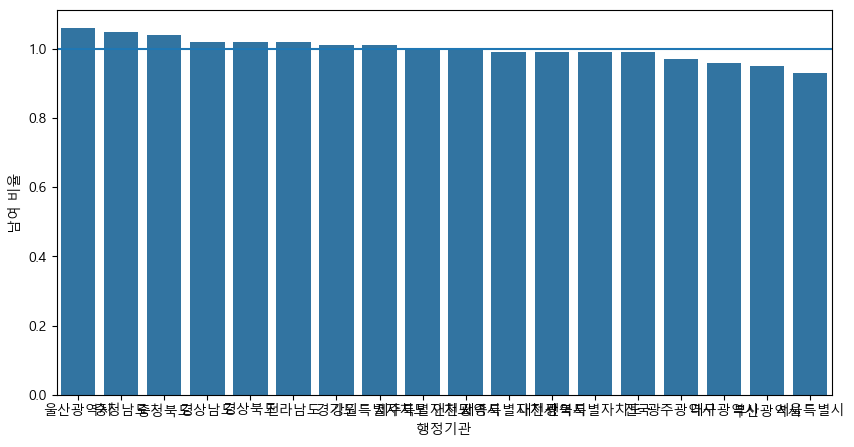

In [45]:
plt.figure(figsize=(10,5))

sns.barplot(x="행정기관", y="남여 비율", data=df_all.sort_values("남여 비율", ascending=False))
plt.axhline(y=1.0)
plt.show


##### 4. 남자초과 / 여자초과 분석
* 남초(남자초과) => 남자 인구가 여자 인구보다 많은 지역	남여 비율 > 1 또는 남자 인구수 > 여자 인구수
* 여초(여자초과) => 여자 인구가 남자 인구보다 많은 지역	남여 비율 < 1 또는 여자 인구수 > 남자 인구수

* 남초여초 컬럼을 추가합니다. 

In [54]:
print("4. 남초 vs 여초 지역 구분")
people_ratio = df_all.reset_index(drop=False)
people_ratio["남초여초"] = people_ratio["남여 비율"].apply(lambda ratio: "남초" if ratio > 1.0 else ("여초" if ratio < 1.0 else "동일"))
people_ratio[["행정기관", "남여 비율", "남초여초"]]


4. 남초 vs 여초 지역 구분


,행정기관,남여 비율,남초여초
0,전국,0.99,여초
1,서울특별시,0.93,여초
2,부산광역시,0.95,여초
3,대구광역시,0.96,여초
4,인천광역시,1.00,동일
5,광주광역시,0.97,여초
6,대전광역시,0.99,여초
7,울산광역시,1.06,남초
8,세종특별자치시,0.99,여초
9,경기도,1.01,남초


##### 5. 세대당 인구 평균보다 높은 지역

In [56]:
print("5. 세대당 인구 평균보다 높은 지역")

df_all.sort_values("세대당 인구", ascending=False)[["행정기관", "세대당 인구"]].reset_index(drop=True)

5. 세대당 인구 평균보다 높은 지역


,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,대구광역시,2.14
5,광주광역시,2.14
6,제주특별자치도,2.13
7,전국,2.12
8,경상남도,2.10
9,대전광역시,2.09


##### 5-1. 남초 vs 여초 개수 Plot  /  지역별 세대수 Plot

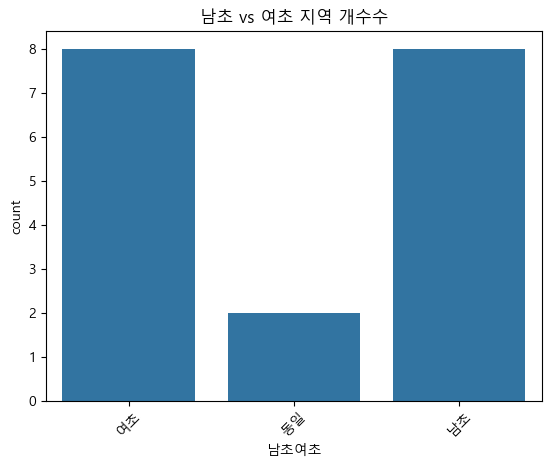

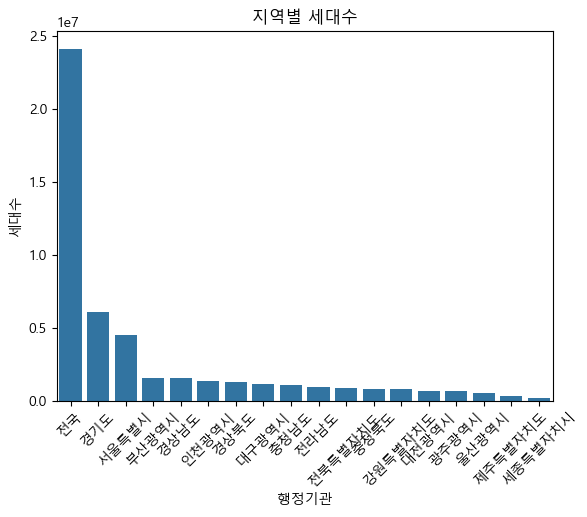

In [60]:

sns.countplot(x="남초여초", data=people_ratio)
# title
plt.title("남초 vs 여초 지역 개수수")
# 글자 45 도 돌리기
plt.xticks(rotation=45)
plt.show()

sns.barplot(x="행정기관", y="세대수", data=df_all.sort_values("세대수",ascending=False))
plt.title("지역별 세대수")
# 글자 45 도 돌리기
plt.xticks(rotation=45)
plt.show()


##### 6. 남자 인구 vs 여자 인구 비교 Plot

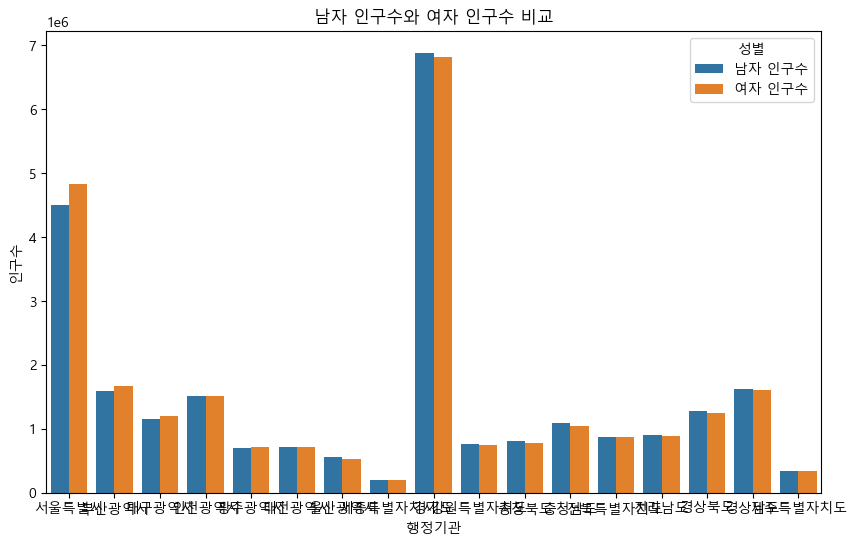

In [69]:

df_melted = df.melt(id_vars=["행정기관"], value_vars=["남자 인구수", "여자 인구수"], 
                    var_name="성별", value_name="인구수")

plt.figure(figsize=(10, 6))

sns.barplot(x='행정기관', y='인구수', hue='성별', data=df_melted)

plt.title('남자 인구수와 여자 인구수 비교')
plt.xlabel('행정기관')
plt.ylabel('인구수')

plt.show()

### 엑셀 리포트 자동 생성 코드

In [22]:
# 엑셀 저장용
from pandas import ExcelWriter
import datetime

# 분석 데이터 준비
top5_population = df[['행정기관', '총인구수']].sort_values(by='총인구수', ascending=False).head(5)
top5_family = df[['행정기관', '세대당 인구']].sort_values(by='세대당 인구', ascending=False).head(5)
male_vs_female = df[['행정기관', '남자 인구수', '여자 인구수']]

# 남초/여초 컬럼 추가
df['남초여초'] = df['남여 비율'].apply(lambda x: '남초' if x > 1 else ('여초' if x < 1 else '동일'))

today = datetime.datetime.now().strftime('%Y%m%d')
filename = f'data/인구분석리포트_{today}.xlsx'

# Excel 파일로 저장
with ExcelWriter(filename, engine='openpyxl') as writer:
    df.to_excel(writer, sheet_name='원본데이터', index=False)
    top5_population.to_excel(writer, sheet_name='총인구 Top5', index=False)
    top5_family.to_excel(writer, sheet_name='세대당 인구 Top5', index=False)
    male_vs_female.to_excel(writer, sheet_name='남자vs여자', index=False)
    
print("엑셀 리포트 저장 완료 → '인구분석리포트.xlsx'")


엑셀 리포트 저장 완료 → '인구분석리포트.xlsx'


In [85]:
# 남녀 인구 차이 컬럼 추가
df['남여차이'] = abs(df['남자 인구수'] - df['여자 인구수'])

# 남녀 비율 TOP5 (남초)
male_dom = df.sort_values(by='남여 비율', ascending=False).head(5)

# 남녀 비율 TOP5 (여초)
female_dom = df.sort_values(by='남여 비율', ascending=True).head(5)

# 세대당 인구 TOP5 (가구당 인구 많은 지역)
big_family = df.sort_values(by='세대당 인구', ascending=False).head(5)

# 세대수 대비 총인구 비율
df['인구/세대'] = df['총인구수'] / df['세대수']

# 수도권 vs 비수도권 비교
capital = df[df['행정기관'].isin(['서울특별시', '경기도', '인천광역시'])]
non_capital = df[~df['행정기관'].isin(['서울특별시', '경기도', '인천광역시'])]


In [89]:

print("남초 TOP5")
male_dom[['행정기관','남여 비율']].reset_index(drop=True)


남초 TOP5


,행정기관,남여 비율
0,울산광역시,1.06
1,충청남도,1.05
2,충청북도,1.04
3,경상남도,1.02
4,경상북도,1.02


In [90]:

print("여초 TOP5")
female_dom[['행정기관','남여 비율']].reset_index(drop=True)


여초 TOP5


,행정기관,남여 비율
0,서울특별시,0.93
1,부산광역시,0.95
2,대구광역시,0.96
3,광주광역시,0.97
4,전북특별자치도,0.99


In [91]:

print("세대당 인구 많은 TOP5")
big_family[['행정기관','세대당 인구']].reset_index(drop=True)


세대당 인구 많은 TOP5


,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,대구광역시,2.14


In [92]:

print("수도권 평균 세대당 인구:", capital['세대당 인구'].mean())
print("비수도권 평균 세대당 인구:", non_capital['세대당 인구'].mean())

수도권 평균 세대당 인구: 2.18
비수도권 평균 세대당 인구: 2.0892857142857144


In [79]:
# 전국 총인구수
total_population = df_all[df_all['행정기관'] == '전국']['총인구수'].values[0]

# 인구비율(%) 컬럼 추가하기
df['인구비율(%)'] = df['총인구수'] / total_population * 100

df

,행정기관코드,행정기관,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,남초여초,인구비율(%)
1,1100000000,서울특별시,9331828,4482063,2.08,4505355,4826473,0.93,여초,18.220098
2,2600000000,부산광역시,3266598,1570403,2.08,1589912,1676686,0.95,여초,6.377929
3,2700000000,대구광역시,2363629,1104130,2.14,1159601,1204028,0.96,여초,4.614911
4,2800000000,인천광역시,3021010,1373827,2.20,1509243,1511767,1.00,여초,5.898426
5,2900000000,광주광역시,1408422,658075,2.14,695224,713198,0.97,여초,2.749899
6,3000000000,대전광역시,1439157,687757,2.09,717291,721866,0.99,여초,2.809908
7,3100000000,울산광역시,1098049,495378,2.22,564888,533161,1.06,남초,2.143906
8,3600000000,세종특별자치시,390685,163432,2.39,194413,196272,0.99,여초,0.762800
9,4100000000,경기도,13694685,6058202,2.26,6882186,6812499,1.01,남초,26.738438
10,5100000000,강원특별자치도,1517766,764834,1.98,763025,754741,1.01,남초,2.963390


In [80]:
# 전국 제외
df_plot = df.sort_values(by='인구비율(%)', ascending=False)
df_plot

,행정기관코드,행정기관,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율,남초여초,인구비율(%)
9,4100000000,경기도,13694685,6058202,2.26,6882186,6812499,1.01,남초,26.738438
1,1100000000,서울특별시,9331828,4482063,2.08,4505355,4826473,0.93,여초,18.220098
2,2600000000,부산광역시,3266598,1570403,2.08,1589912,1676686,0.95,여초,6.377929
16,4800000000,경상남도,3228380,1537492,2.10,1626926,1601454,1.02,남초,6.303310
4,2800000000,인천광역시,3021010,1373827,2.20,1509243,1511767,1.00,여초,5.898426
15,4700000000,경상북도,2531384,1291568,1.96,1280547,1250837,1.02,남초,4.942447
3,2700000000,대구광역시,2363629,1104130,2.14,1159601,1204028,0.96,여초,4.614911
12,4400000000,충청남도,2136574,1052129,2.03,1096128,1040446,1.05,남초,4.171593
14,4600000000,전라남도,1788819,912412,1.96,902380,886439,1.02,남초,3.492612
13,5200000000,전북특별자치도,1738690,864608,2.01,866030,872660,0.99,여초,3.394737


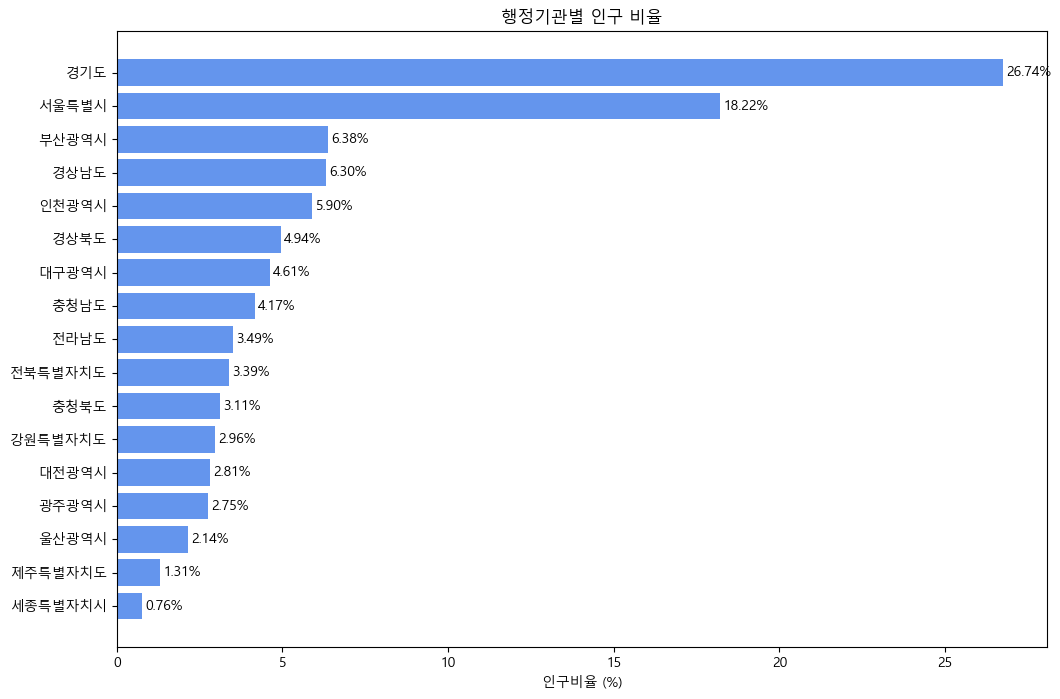

In [93]:

# 시각화
plt.figure(figsize=(12, 8))
bars = plt.barh(df_plot['행정기관'], df_plot['인구비율(%)'], color='cornflowerblue')

plt.xlabel('인구비율 (%)')
plt.title('행정기관별 인구 비율')

# 값 표시
for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.2f}%", va='center')

plt.gca().invert_yaxis()
plt.show()